# Sentiment analysis with an MLP and vector representation

# Case Study: Sentiment Analysis

In this lab we use part of the 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle. The dataset contain the following information:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We are mainly interested by the 'Reviews' (X) and by the 'Rating' (y)


The goal is to try to predict the 'Rating' after reading the 'Reviews'. I've prepared for you TRAIN and TEST set.
The work to be done is as follows:

1. Feature extraction and baseline
    * read the dataset and understand it
    * put it in a format so that you can use `CountVectorizer` or`Tf-IDF` to extract the desired features
    * perform on the desired dates and preprocessing
    * use one of the classifiers you know to predict the polarity of different sentences
1. My first neural network
    * reuse the features already extracted 
    * proposed a neural network built with Keras
1. Hyper-parameter fitting
    * for the base line: adjust min_df, max_df, ngram, max_features + model's hyper-parameter
    * for the neural network: adjust batch size, number of layers and number of neuron by layers, use earlystop
1. <span style="color:red">Word embedding
    * stage 1 build a network that uses Keras' embedding which is not language sensitive.
    * stage 2 build a network that simultaneously uses Keras' embedding and the features extracted in the first weeks.
    * stage 3 try to use an existing embedding (https://github.com/facebookresearch/MUSE)
    </span>

**WARNING:** the dataset is voluminous, I can only encourage you to work first on a small part of it and only at the end, when the code is well debugged and that it is necessary to build the "final model", to use the whole dataset.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-the-dataset" data-toc-modified-id="Read-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read the dataset</a></span></li><li><span><a href="#Text-normalisation" data-toc-modified-id="Text-normalisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Text normalisation</a></span></li><li><span><a href="#Approach1---BOW-and-MLP-classifier" data-toc-modified-id="Approach1---BOW-and-MLP-classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Approach1 - BOW and MLP classifier</a></span></li><li><span><a href="#Approach2---Keras-word-embedding-and-MLP-classifier" data-toc-modified-id="Approach2---Keras-word-embedding-and-MLP-classifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Approach2 - Keras word embedding and MLP classifier</a></span></li></ul></div>

## Read the dataset

Could you find below a proposal. You can complete them.

In [72]:
#!pip install tensorflow-addons

In [73]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from keras.layers import Input, TextVectorization, Dense, Flatten, Embedding

from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder

import tensorflow_addons as tfa
from tensorflow_addons.metrics import F1Score

In [74]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

TRAIN.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0


In [75]:
''' Construct X_train and y_train '''
X_train = TRAIN['Reviews']
y_train = np.array(TRAIN['Rating']).reshape(-1,1)

X_test = TEST['Reviews']
y_test = np.array(TEST['Rating']).reshape(-1,1)

nb_classes = len(np.unique(y_train))

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train_enc = ohe.fit_transform(y_train)
y_test_enc = ohe.fit_transform(y_test)

X_train.shape, y_train_enc.shape, np.unique(y_train)

((5000,), (5000, 5), array([1, 2, 3, 4, 5], dtype=int64))

## Approach1 - BOW and MLP classifier

Using the course companion notebook, build a multi-layer perceptron using a BOW representation of the dataset and evaluate the model.

The dataset being unbalanced the metric will be the f1 score.

$$TO DO STUDENT$$
> * Build BOW representation of the train and test set
> * Fix a value for vocab_size = the maximum number of words to keep, based on word frequency. Only the most common vocab_size-1 words will be kept.

In [76]:
vocab_size = 8991

tokenize = Tokenizer(num_words=vocab_size, char_level=False)
tokenize.fit_on_texts(X_train) # Remember : you have to fit only on a train part
X_train_enc = tokenize.texts_to_matrix(X_train, mode='tfidf')
X_test_enc = tokenize.texts_to_matrix(X_test, mode='tfidf')

In [77]:
X_train_enc.shape,X_test_enc.shape

((5000, 8991), (1000, 8991))

$$TO DO STUDENT$$

> * Build an MLP and print the model (model.summary())

In [78]:
# Your code
# define the model
input_ = Input(shape=(vocab_size, ), name="input", dtype=tf.float32)
x = Dense(256, activation="relu", name="hidden")(input_)
output_ = Dense(5, activation='softmax', name="output")(x)
model = Model(input_, output_)
# summarize the model
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 8991)]            0         
_________________________________________________________________
hidden (Dense)               (None, 256)               2301952   
_________________________________________________________________
output (Dense)               (None, 5)                 1285      
Total params: 2,303,237
Trainable params: 2,303,237
Non-trainable params: 0
_________________________________________________________________


$$ TO DO STUDENT $$
> * Compile the network
> * Fit the network using EarlyStopping
> * Babysit your model
> * Evaluate the network with f1 score

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
import keras.backend as K
def f1_score(y_true, y_pred):
    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))
    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0.0
    # How many selected items are relevant?
    precision = c1 / c2
    # How many relevant items are selected?
    recall = c1 / c3
    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [81]:
# compile the model with f1 metrics
# Your code
import tensorflow_addons as tfa
# Compile the model and start training
# I used in metrics before "accuracy" >> check it again
model.compile(loss='categorical_crossentropy', metrics=[f1_score], optimizer='adam')
# Stop training with early stopping with patience of 20
callbacks_list = [EarlyStopping(monitor='val_f1_score', min_delta=0.005, patience=20,
                                verbose=2, mode='min', restore_best_weights=True)
                 ]

In [82]:
X_train_enc.shape,y_train_enc.shape,X_test_enc.shape, y_test_enc.shape

((5000, 8991), (5000, 5), (1000, 8991), (1000, 5))

In [83]:
# fit model using ealy stopping
# Your code
history = model.fit(X_train_enc, y_train_enc, validation_data = (X_test_enc,y_test_enc), callbacks=callbacks_list,
                    batch_size=32, epochs=20)

Epoch 1/20
157/157 [==============================] - 3s 19ms/step - loss: 1.0849 - f1_score: nan - val_loss: 0.8763 - val_f1_score: 0.6640
Epoch 2/20
157/157 [==============================] - 3s 18ms/step - loss: 0.3963 - f1_score: 0.8634 - val_loss: 0.9836 - val_f1_score: 0.6771
Epoch 3/20
157/157 [==============================] - 3s 18ms/step - loss: 0.2158 - f1_score: 0.9371 - val_loss: 1.1156 - val_f1_score: 0.6737
Epoch 4/20
157/157 [==============================] - 3s 18ms/step - loss: 0.1462 - f1_score: 0.9554 - val_loss: 1.3094 - val_f1_score: 0.6682
Epoch 5/20
157/157 [==============================] - 3s 17ms/step - loss: 0.1171 - f1_score: 0.9653 - val_loss: 1.4828 - val_f1_score: 0.6670
Epoch 6/20
157/157 [==============================] - 3s 17ms/step - loss: 0.0996 - f1_score: 0.9695 - val_loss: 1.6477 - val_f1_score: 0.6642
Epoch 7/20
157/157 [==============================] - 3s 18ms/step - loss: 0.0893 - f1_score: 0.9723 - val_loss: 1.7352 - val_f1_score: 0.6567
Ep

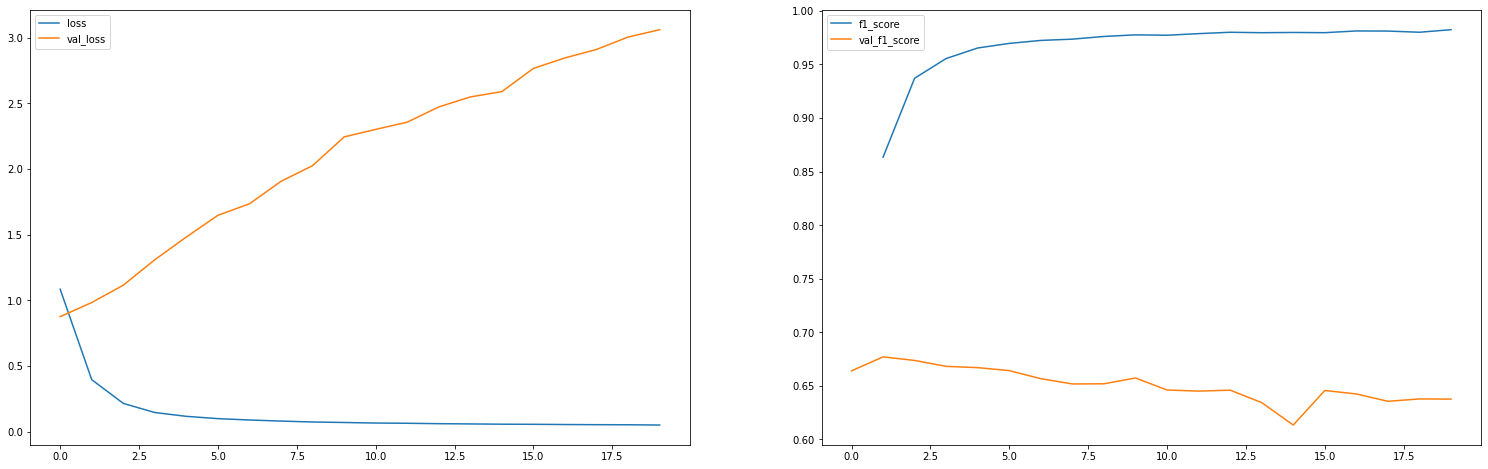

<AxesSubplot:>

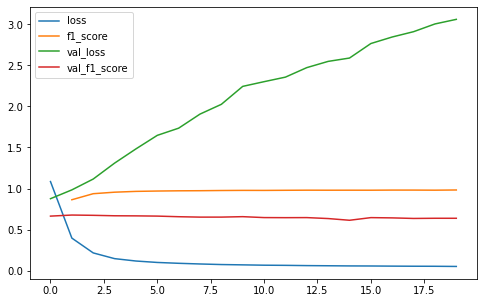

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the learning curves and analyze them
# Babysit your model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26,8))

ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()
ax2.plot(history.history['f1_score'], label="f1_score")
ax2.plot(history.history['val_f1_score'], label="val_f1_score")
ax2.legend()
plt.show()
# It's possible to plot them very easily using: 
pd.DataFrame(history.history).plot(figsize=(8,5))

In [85]:
# Babysit the model - use you favourite plot
# pd.DataFrame({#'val_loss':history.history['val_loss'],
#               #'loss':history.history['loss'],
#               #'val_f1_score':history.history['val_f1_score'],
#               # 'f1_score':history.history['f1_score'],
#               #'val_accuracy':history.history['val_accuracy'],
#               #'accuracy':history.history['accuracy']
#              }).plot(figsize=(8,5))

In [86]:
# Evaluate the model with f1 metrics (Tensorflow f1 metrics or sklearn)
# Your code
# Evaluate the model
score = model.evaluate(X_test_enc, y_test_enc)
print('Test loss:', score[0])
print('Test accuracy', score[1])

32/32 [==============================] - 1s 5ms/step - loss: 3.0607 - f1_score: 0.6376
Test loss: 3.0606963634490967
Test accuracy 0.6376453042030334


## Approach2 - Keras word embedding and MLP classifier

Using the course companion notebook, build a multi-layer perceptron using an Embedding Keras layer and the same classifier as in approach 1. Evaluate the model.

$$ TO DO STUDENTS $$
> * fix the max_lengh of a review (max number of token in a review)
> * use the same vocab_size as previously
> * fix the embedding dimension (embed_dim variable)

In [87]:
# Tokenized the reviews
from nltk.tokenize import word_tokenize
reviews_tokenized = [word_tokenize(review) for review in TRAIN['Reviews']]
a=[len(x) for x in reviews_tokenized] # count number of token per review 
max(a) # print the maximum number of token

1137

In [88]:
max_len = 2000   # Sequence length to pad the outputs to.
                # In order to fix it, you have to know the distribution on lengh... see first lab
embed_dim = 50 # embedding dimension

$$ TO DO STUDENTS $$

>* Create a vectorizer_layer with TextVectorization function
>* Fit the vectorizer_layer (adapt function

In [89]:
from keras.layers import Input, TextVectorization, Dense, Flatten, Embedding
# Your code
vectorizer_layer = TextVectorization(max_tokens=max_len, output_sequence_length=max_len)
vectorizer_layer.adapt(X_train)
X_train_vec= vectorizer_layer(X_train)
X_test_vec = vectorizer_layer(X_test)

In [90]:
X_test_vec.shape, y_test_enc.shape

(TensorShape([1000, 2000]), (1000, 5))

$$TO DO STUDENT$$

> * Build an MLP and print the model (model.summary())

In [91]:
# Build word dict
voc = vectorizer_layer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))
# word_index

In [92]:
#If necessary, download glove matrix
# !python -m wget http://nlp.stanford.edu/data/glove.6B.zip
# unzip -q glove.6B.zip

In [93]:
# Make a dict mapping words (strings) to their NumPy vector representation:
path_to_glove_file = "glove.6B.50d.txt"

embeddings_index = {}
with open(path_to_glove_file,encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [94]:
# num_tokens = len(voc) + 2
# embedding_dim = 50
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((max_len, embed_dim))
for word, i in word_index.items():
    print(word, i)
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

 0
[UNK] 1
the 2
i 3
it 4
and 5
phone 6
a 7
to 8
is 9
this 10
for 11
of 12
with 13
my 14
not 15
in 16
was 17
that 18
but 19
on 20
have 21
you 22
great 23
good 24
as 25
very 26
so 27
its 28
had 29
one 30
be 31
like 32
no 33
all 34
or 35
me 36
if 37
just 38
battery 39
use 40
has 41
screen 42
are 43
an 44
would 45
only 46
from 47
at 48
works 49
when 50
can 51
love 52
will 53
get 54
new 55
they 56
work 57
up 58
really 59
time 60
than 61
phones 62
dont 63
price 64
product 65
out 66
camera 67
im 68
am 69
about 70
because 71
buy 72
well 73
do 74
after 75
bought 76
sim 77
card 78
got 79
even 80
more 81
also 82
what 83
other 84
there 85
which 86
back 87
now 88
your 89
iphone 90
does 91
any 92
some 93
used 94
nice 95
excellent 96
fast 97
did 98
better 99
quality 100
apps 101
doesnt 102
unlocked 103
then 104
been 105
could 106
came 107
problem 108
much 109
case 110
best 111
perfect 112
by 113
using 114
first 115
android 116
too 117
working 118
2 119
still 120
off 121
life 122
want 123
need 124
di

In [95]:
embedding_layer = Embedding(
    max_len,
    embed_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [96]:
# define the model
input_ = Input(shape=(max_len,), dtype=tf.int32)
x = embedding_layer(input_)
x = Flatten()(x)
output_ = Dense(5, activation='sigmoid')(x)
model1 = Model(input_, output_)
# summarize the model
model1.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2000)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 2000, 50)          100000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 100000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 500005    
Total params: 600,005
Trainable params: 500,005
Non-trainable params: 100,000
_________________________________________________________________


$$ TO DO STUDENT $$
> * Compile the network
> * Fit the network using EarlyStopping
> * Babysit your model
> * Evaluate the network with f1 score

In [97]:
# compile the model with metrics f1 score
# Your code
# compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_score])


In [98]:
# fit model using ealy stopping
# Your code
# Stop training with early stopping with patience of 20
callbacks_list = [EarlyStopping(monitor='val_f1_score', min_delta=0.005, patience=20,
                                verbose=2, mode='min', restore_best_weights=True)
                 ]

In [99]:
history = model1.fit(X_train_vec, y_train_enc, validation_data = (X_test_vec,y_test_enc), callbacks=callbacks_list,
                    batch_size=32, epochs=20)

Epoch 1/20
157/157 [==============================] - 3s 17ms/step - loss: 0.4569 - f1_score: 0.5048 - val_loss: 0.4130 - val_f1_score: 0.5565
Epoch 2/20
157/157 [==============================] - 2s 15ms/step - loss: 0.3373 - f1_score: 0.6247 - val_loss: 0.3961 - val_f1_score: 0.5615
Epoch 3/20
157/157 [==============================] - 2s 16ms/step - loss: 0.2982 - f1_score: 0.6739 - val_loss: 0.3987 - val_f1_score: 0.5792
Epoch 4/20
157/157 [==============================] - 2s 15ms/step - loss: 0.2748 - f1_score: 0.7107 - val_loss: 0.3919 - val_f1_score: 0.5818
Epoch 5/20
157/157 [==============================] - 3s 16ms/step - loss: 0.2582 - f1_score: 0.7329 - val_loss: 0.3963 - val_f1_score: 0.5730
Epoch 6/20
157/157 [==============================] - 2s 15ms/step - loss: 0.2452 - f1_score: 0.7530 - val_loss: 0.4006 - val_f1_score: 0.5761
Epoch 7/20
157/157 [==============================] - 2s 15ms/step - loss: 0.2343 - f1_score: 0.7654 - val_loss: 0.4043 - val_f1_score: 0.5893

<AxesSubplot:>

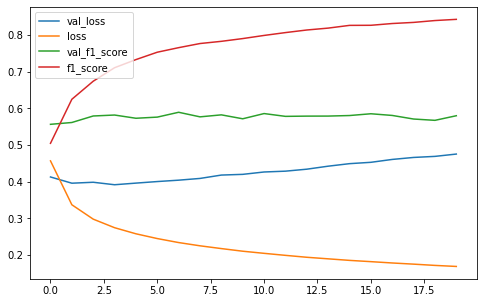

In [100]:
# Babysit the model
pd.DataFrame({'val_loss':history.history['val_loss'],
              'loss':history.history['loss'],
             'val_f1_score':history.history['val_f1_score'],
              'f1_score':history.history['f1_score']}).plot(figsize=(8,5))


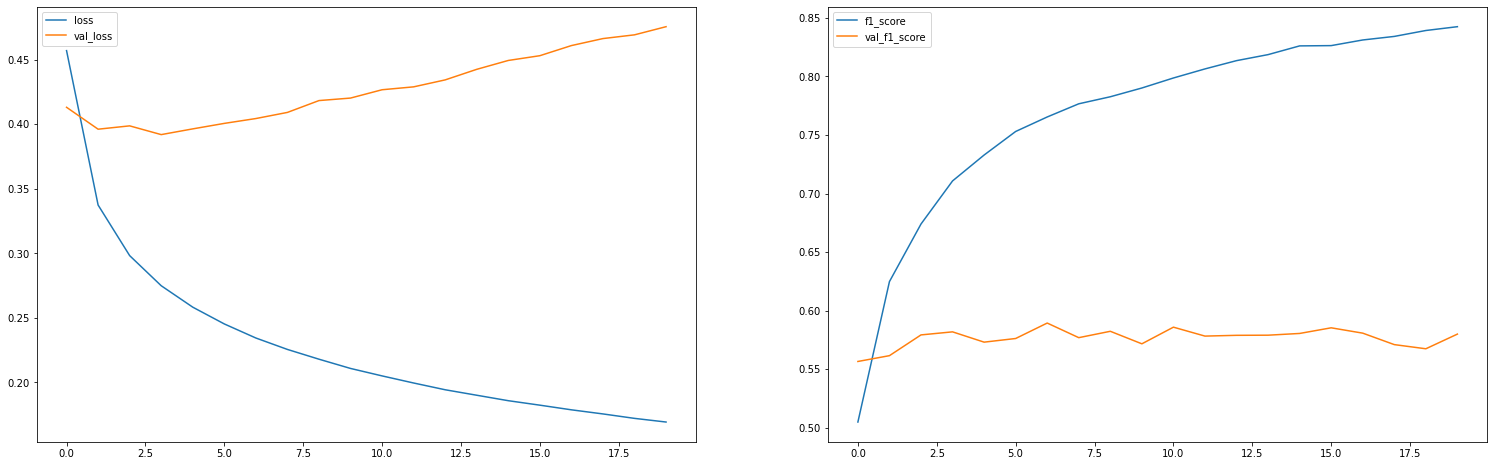

<AxesSubplot:>

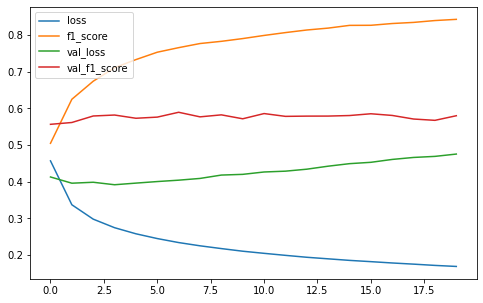

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26,8))

ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()
ax2.plot(history.history['f1_score'], label="f1_score")
ax2.plot(history.history['val_f1_score'], label="val_f1_score")
ax2.legend()
plt.show()
# It's possible to plot them very easily using: 
pd.DataFrame(history.history).plot(figsize=(8,5))

In [102]:
# Evaluate the model
# Your code
# Evaluate the model with f1 metrics (Tensorflow f1 metrics or sklearn)
# Your code
# Evaluate the model
score = model1.evaluate(X_test_vec, y_test_enc)
print('Test loss:', score[0])
print('Test accuracy', score[1])

32/32 [==============================] - 1s 7ms/step - loss: 0.4755 - f1_score: 0.5799
Test loss: 0.47546786069869995
Test accuracy 0.5798975825309753


## Approach3 - Word embedding and MLP classifier

Using the course companion notebook, build a multi-layer perceptron using an existing embedding matrix (Word2Vec / Glove or FastText), or on an embedding matrix that you will have built using Gensim.

Use the same constant as a previous steps.

Evaluate the model.

In [ ]:
# Same steps as Keras Embedding
# Your code

In [ ]:
# Build word dict
# Your code

In [ ]:
# Make a dict mapping words (strings) to their NumPy vector representation:
# Your code

In [ ]:
# Prepare embedding matrix
# Your code

In [ ]:
# Define embedding layers
# Your code

In [ ]:
# define the model
# Your code

In [ ]:
# compile the model
# Your code

In [ ]:
# fit model using ealy stopping
# Your code

In [ ]:
# Babysit the model
pd.DataFrame({'val_loss':history.history['val_loss'],
              'loss':history.history['loss'],
             'val_f1_score':history.history['val_f1_score'],
              'f1_score':history.history['f1_score']}).plot(figsize=(8,5))

In [ ]:
# Evaluate the model
# Your code

## Approach3 - Word embedding and MLP classifier

Using the course companion notebook, build a multi-layer perceptron using an existing embedding matrix (Word2Vec / Glove or FastText), or on an embedding matrix that you will have built using Gensim.

Use the same constant as a previous steps.

Evaluate the model.

In [110]:
# Avalaible in your gensim installation... 
# You can also use the train reviews.
corpus_path="/Users/Polytech/anaconda3/Lib/site-packages/gensim/test/test_data/"
# corpus_path="..\Users\Polytech\anaconda3\Lib\site-packages\gensim\test\test_data"
corpus="lee_background.cor"

In [111]:
# Build gensim model
from gensim.test.utils import datapath
from gensim import utils
import gensim.models

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __iter__(self):
        for line in open(corpus_path+corpus):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)
            

sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences, vector_size=150)

In [112]:
# Export gensim model
import tempfile

with tempfile.NamedTemporaryFile(prefix='gensim-model-', delete=False) as tmp:
    temporary_filepath = tmp.name
    print(temporary_filepath)
    model.save(temporary_filepath)
    #
    # The model is now safely stored in the filepath.
    # You can copy it to other machines, share it with others, etc.
    #
    # To load a saved model:
    #
    new_model = gensim.models.Word2Vec.load(temporary_filepath)

C:\Users\Polytech\AppData\Local\Temp\gensim-model-e7ld8hgq


In [113]:
# Load gensim model
new_model = gensim.models.Word2Vec.load(temporary_filepath)

In [114]:
# Prepare embedding matrix
# Your code
# num_tokens = len(voc) + 2
# embedding_dim = 150
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((max_len, embed_dim))
for word, i in word_index.items():
    try:
        model.wv[word]
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = model.wv[word]
        hits += 1
    except :
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 0 words (2000 misses)


In [115]:
# Define embedding layers
# Your code
embedding_layer = Embedding(
    max_len,
    embed_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [117]:
# define the model
# Your code
# define the model
input_ = Input(shape=(max_len,), dtype=tf.int32)
x = embedding_layer(input_)
x = Flatten()(x)
output_ = Dense(5, activation='sigmoid')(x)
model3 = Model(input_, output_)
# summarize the model
model3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 2000)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 2000, 50)          100000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 100000)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 500005    
Total params: 600,005
Trainable params: 500,005
Non-trainable params: 100,000
_________________________________________________________________


In [118]:
# compile the model
# Your code
# compile the model with metrics f1 score
# Your code
# compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_score])


In [119]:
# fit model using ealy stopping
# Your code

# Stop training with early stopping with patience of 20
callbacks_list = [EarlyStopping(monitor='val_f1_score', min_delta=0.005, patience=20,
                                verbose=2, mode='min', restore_best_weights=True)
                 ]

history = model3.fit(X_train_vec, y_train_enc, validation_data = (X_test_vec,y_test_enc), callbacks=callbacks_list,
                    batch_size=32, epochs=20)

Epoch 1/20
157/157 [==============================] - 3s 16ms/step - loss: 0.6704 - f1_score: nan - val_loss: 0.6476 - val_f1_score: 0.5547
Epoch 2/20
157/157 [==============================] - 2s 15ms/step - loss: 0.6290 - f1_score: 0.5382 - val_loss: 0.6090 - val_f1_score: 0.5547
Epoch 3/20
157/157 [==============================] - 2s 14ms/step - loss: 0.5939 - f1_score: 0.5394 - val_loss: 0.5761 - val_f1_score: 0.5547
Epoch 4/20
157/157 [==============================] - 2s 15ms/step - loss: 0.5642 - f1_score: 0.5382 - val_loss: 0.5485 - val_f1_score: 0.5547
Epoch 5/20
157/157 [==============================] - 3s 16ms/step - loss: 0.5392 - f1_score: 0.5376 - val_loss: 0.5252 - val_f1_score: 0.5547
Epoch 6/20
157/157 [==============================] - 2s 14ms/step - loss: 0.5183 - f1_score: 0.5388 - val_loss: 0.5056 - val_f1_score: 0.5547
Epoch 7/20
157/157 [==============================] - 2s 15ms/step - loss: 0.5007 - f1_score: 0.5382 - val_loss: 0.4891 - val_f1_score: 0.5547
Ep

<AxesSubplot:>

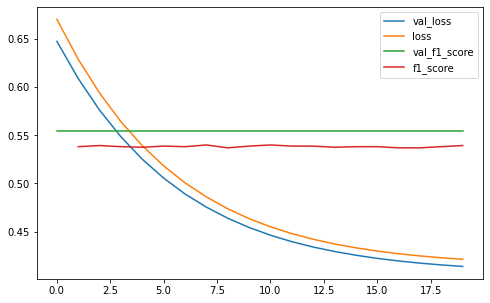

In [120]:
# Babysit the model
pd.DataFrame({'val_loss':history.history['val_loss'],
              'loss':history.history['loss'],
             'val_f1_score':history.history['val_f1_score'],
              'f1_score':history.history['f1_score']}).plot(figsize=(8,5))

In [121]:
# Evaluate the model
# Your code
# Evaluate the model
# Your code
# Evaluate the model with f1 metrics (Tensorflow f1 metrics or sklearn)
# Your code
# Evaluate the model
score = model3.evaluate(X_test_vec, y_test_enc)
print('Test loss:', score[0])
print('Test accuracy', score[1])

32/32 [==============================] - 1s 10ms/step - loss: 0.4139 - f1_score: 0.5547
Test loss: 0.4138636589050293
Test accuracy 0.5546875
